(Material adapted by Luis Fernando Laris Pardo's)
# Autoencoders
For today's exercise we are going to be implementing autoencoders, one cool implementation can be found [here](https://medium.com/@sorenlind/a-deep-convolutional-denoising-autoencoder-for-image-classification-26c777d3b88e) where autoencoders are used to get unnoisy images from magic the gathering cards. 

For this I have used the most common starter example for autoencoders that can be found using the mnist dataset. Remember that the autoencoder is doing something similar to the following:

![image](https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_denoising_autoencoder_overview.png)

As in previous weeks the code is already given, but I would ask you to do the following things:

* Add noise to the input images and see how your autoencoder works with these.
* Add more dense layers to your autoencoder model (hint: you can use: x = Dense(128, activation='relu')(input_img) as your initial layer and then instead of the "encoded" variable as you have it right now you can change input_img for x)
* create an autoencoder that uses CNNs


In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adadelta, SGD, Adam
import matplotlib.pyplot as plt

### Read the data and flatten it
In this case, first we are going to use dense layers, here is another way to flattern your data before giving it to the dense layer.

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# flatten the data (if working with Dense Network)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Noise to x_train, x_test
x_train_noisy = x_train # + np.random.normal(loc=0.0, scale=0.1, size=x_train.shape)
x_test_noisy = x_test # + np.random.normal(loc=0.0, scale=0.1, size=x_test.shape)

# OPTIONAL - Transform the data (random translation/rotation/scale/shear/whatever)
# YOUR CODE HERE

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Create your autoencoder
We can now create the model for the autoencoder, in this case is a very simple one where of an input layer, one hiden layer (the encoded part) and an output later (the decoded part).

In [4]:
# this is the size of our encoded representations
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

### The encoder and decoder models
This models we are going to use them later to test the results.


In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

### Time to train our model
Try different optimizers, deffinitely SGD is not the best for this task. you should be able to ger good results with the setup given

In [6]:
opt = Adam()
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')

In [7]:
# Use the noisy data as your input and the non-noisy data as the ground truth
autoencoder.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/200
235/235 [==============================] - 2s 6ms/step - loss: 0.3849 - val_loss: 0.1859
Epoch 2/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1776 - val_loss: 0.1518
Epoch 3/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1478 - val_loss: 0.1329
Epoch 4/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1311 - val_loss: 0.1215
Epoch 5/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1205 - val_loss: 0.1133
Epoch 6/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1129 - val_loss: 0.1074
Epoch 7/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1074 - val_loss: 0.1028
Epoch 8/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1031 - val_loss: 0.0995
Epoch 9/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1001 - val_loss: 0.0971
Epoch 10/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0979 - val_lo

235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0914
Epoch 82/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 83/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0922 - val_loss: 0.0913
Epoch 84/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0913
Epoch 85/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0914
Epoch 86/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0913
Epoch 87/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0913
Epoch 88/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 89/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 90/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 

Epoch 161/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0920 - val_loss: 0.0910
Epoch 162/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0910
Epoch 163/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 164/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0910
Epoch 165/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 166/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0920 - val_loss: 0.0909
Epoch 167/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 168/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0920 - val_loss: 0.0910
Epoch 169/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0910
Epoch 170/200
235/235 [==============================] - 1s 3ms/step - lo

### Now let's test our Autoencoder!
One important thing to notice is how reshape is used to rearrange the image plot it.

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

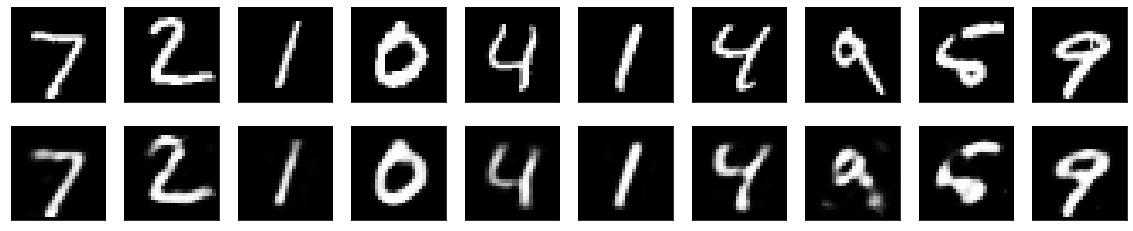

In [9]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()